In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ferramentas do Scikit-Learn
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier # Modelo 

In [17]:
# Configuração visual
sns.set_theme(style="whitegrid")

In [40]:
# ------------------------------------------------------------------------------
# 1. CARREGAMENTO DOS DADOS
# ------------------------------------------------------------------------------
print("--- 1. Carregando Dataset Breast Cancer Wisconsin ---")

breast_cancer_data = datasets.load_breast_cancer()

df = pd.DataFrame(data=breast_cancer_data.data, columns=breast_cancer_data.feature_names)

df["malignant"] = (breast_cancer_data.target == 0)
df["benign"] = (breast_cancer_data.target == 1)

#display(df.head())

--- 1. Carregando Dataset Breast Cancer Wisconsin ---


In [41]:
# ------------------------------------------------------------------------------
# 2. ANÁLISE BÁSICA (DIAGNÓSTICO)
# ------------------------------------------------------------------------------
print("\n--- 2. Diagnóstico: Dados em Falta e Escalas ---")

# A. Verificando dados em falta
print("Contagem de nulos por coluna:")
print(df.isnull().sum())
print("-" * 30)


--- 2. Diagnóstico: Dados em Falta e Escalas ---
Contagem de nulos por coluna:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
malignant                  0
benign               

Estatísticas Descritivas:


,mean area,mean smoothness
count,569.000000,569.000000
mean,654.889104,0.096360
std,351.914129,0.014064
min,143.500000,0.052630
25%,420.300000,0.086370
50%,551.100000,0.095870
75%,782.700000,0.105300
max,2501.000000,0.163400


Text(0, 0.5, 'Valor')

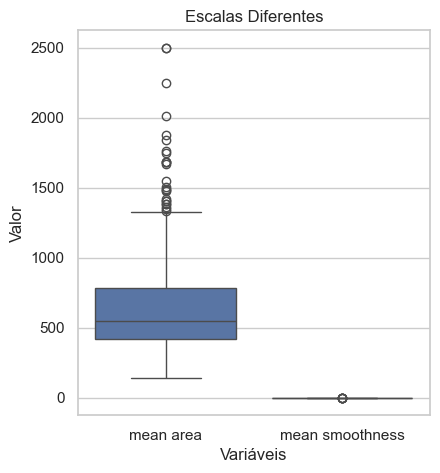

In [42]:
# ------------------------------------------------------------------------------
# 3. COMPARAR COLUNAS (DIAGNÓSTICO)
# ------------------------------------------------------------------------------
# Vamos comparar 'age' (Idade) e 'fare' (Tarifa)
print("Estatísticas Descritivas:")
display(df[['mean area','mean smoothness']].describe())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['mean area','mean smoothness']])
plt.title("Escalas Diferentes")
plt.xlabel("Variáveis")
plt.ylabel("Valor")


In [ ]:
# ------------------------------------------------------------------------------
# 5. DIVISÃO EM TREINO E TESTE (Holdout)
# ------------------------------------------------------------------------------
print("\n--- 5. Divisão Treino/Teste ---")

# Separar Atributos (X) do Alvo (y)
X = df.drop('Survived', axis=1) # Tudo menos 'survived'
y = df['Survived']              # Apenas 'survived'

# Divisão 70% Treino, 30% Teste
# stratify=y garante que a proporção de sobreviventes seja igual nos dois grupos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Tamanho do Treino: {X_train.shape}")
print(f"Tamanho do Teste:  {X_test.shape}")